In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print("Mean Age:", df['Age'].mean())
print("Median Age:", df['Age'].median())
print("Std Dev Age:", df['Age'].std())
print("\nMean Fare:", df['Fare'].mean())
print("Median Fare:", df['Fare'].median())
print("Std Dev Fare:", df['Fare'].std())

Mean Age: 29.69911764705882
Median Age: 28.0
Std Dev Age: 14.526497332334044

Mean Fare: 32.204207968574636
Median Fare: 14.4542
Std Dev Fare: 49.693428597180905


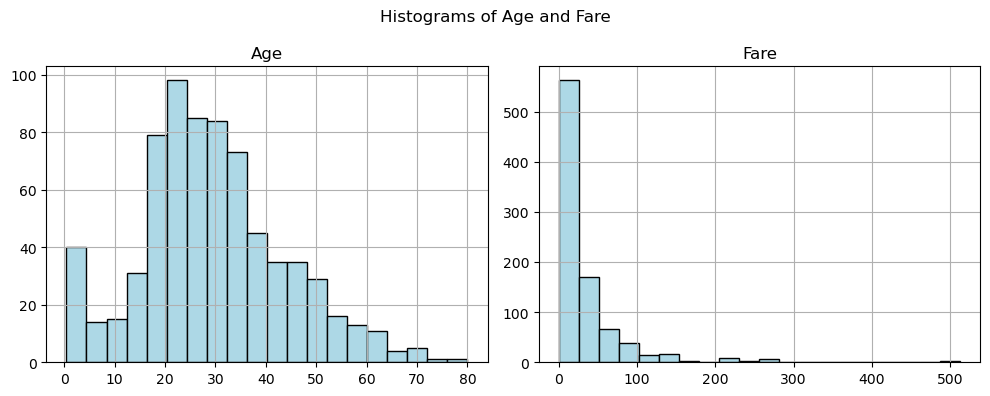

In [5]:
df[['Age', 'Fare']].hist(figsize=(10, 4), bins=20, color='lightblue', edgecolor='black')
plt.suptitle("Histograms of Age and Fare")
plt.tight_layout()
plt.show()

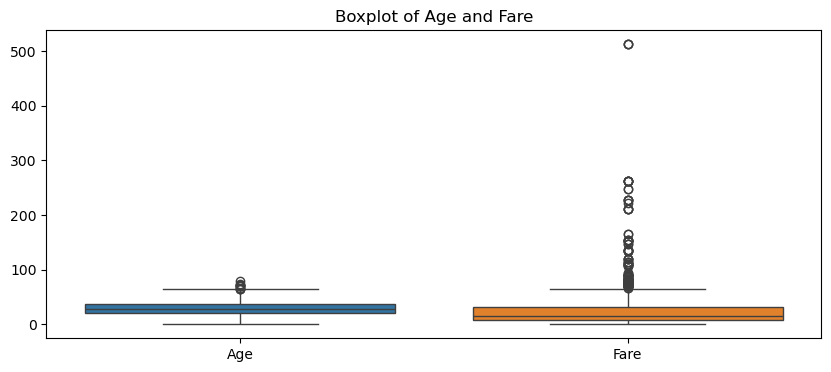

In [6]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot of Age and Fare")
plt.show()

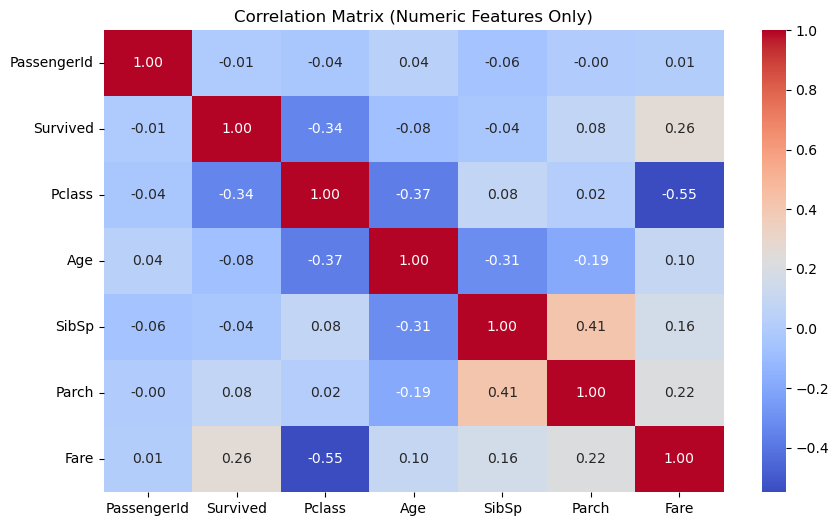

In [7]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

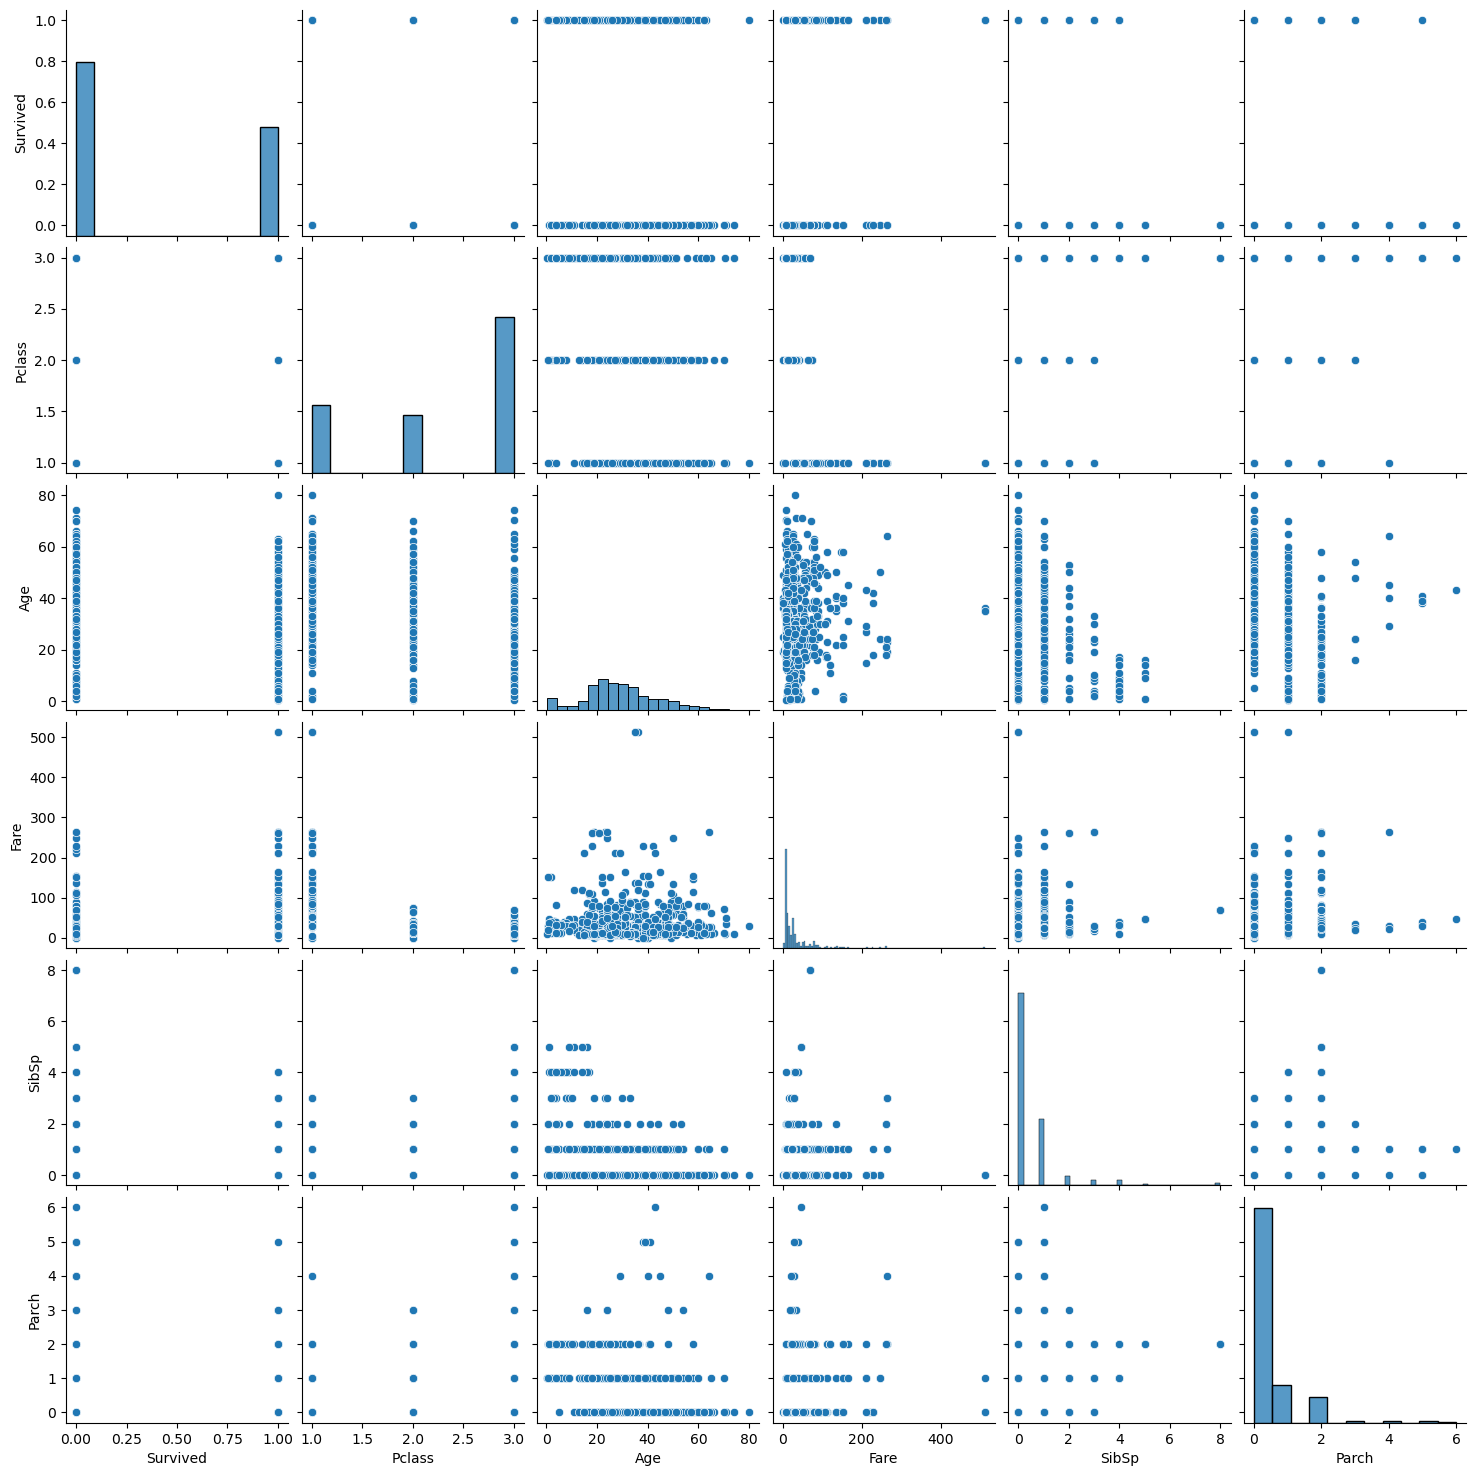

In [8]:
sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']])

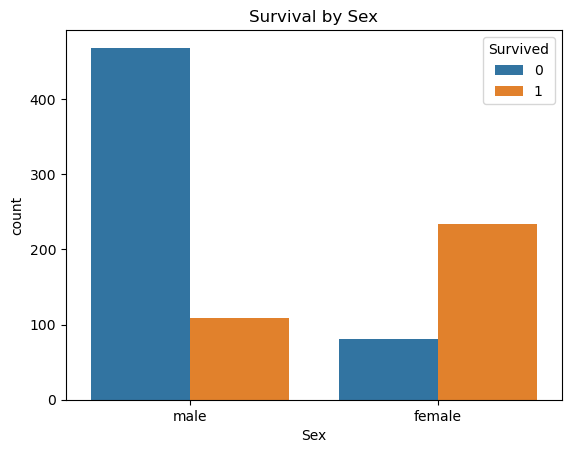

In [9]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

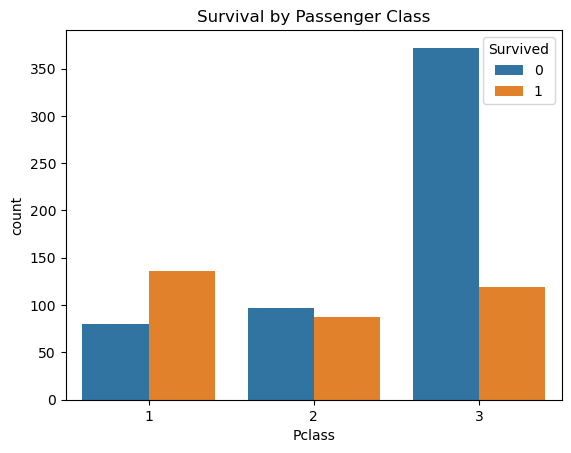

In [10]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

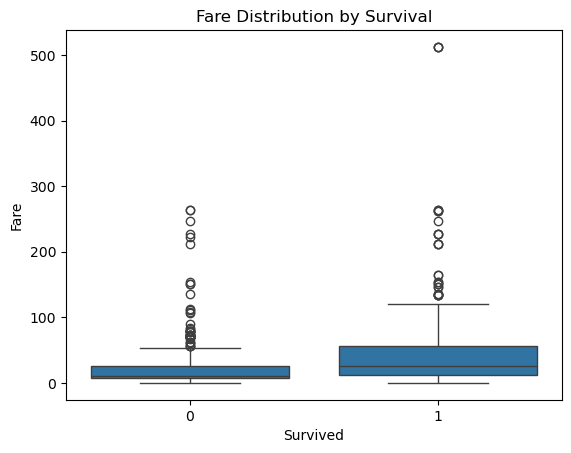

In [11]:
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title("Fare Distribution by Survival")
plt.show()

Basic Feature-Level Inferences from Visuals

Sex vs Survival
    From the countplot, females had a much higher survival rate than males.
    This suggests that gender was a key factor in survival on the Titanic.
Pclass vs Survival
    Passengers in 1st class had a significantly higher chance of survival compared to 2nd and 3rd class.
    Those in 3rd class had the lowest survival rate, showing that passenger class played an important role.
Fare
    Fare is right-skewed — most passengers paid lower fares, while a few paid very high prices.
    Passengers who paid higher fares tended to have a better survival rate, likely because they were in better cabins or higher classes.
Age
    Most passengers were between 20 and 40 years old.
    Younger children and teenagers show slightly better survival.
    Outliers include very young children and very old passengers.
Correlation Matrix
    Survived is positively correlated with Fare and Sex (when encoded).
    Pclass is negatively correlated with Survived, confirming that higher class = better chance.
    Age, SibSp, and Parch have weak correlations, but may still carry predictive value when combined.